In [2]:
import os
import kaggle

GPLAY_PATH = os.path.join("datasets", "gplay")
GPLAY_URL = "lava18/google-play-store-apps"

def fetch_gplay_data(gplay_url=GPLAY_URL, gplay_path=GPLAY_PATH):
    '''
    Creates a datasets/gplay directory in your workspace,
    downloads the google-play-store-apps.zip file,
    and extract its files in this directory
    '''
    if not os.path.isdir(gplay_path):
        os.makedirs(gplay_path)
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(gplay_url, path=gplay_path, unzip=True)

In [3]:
fetch_gplay_data()

In [4]:
import pandas as pd

def load_gplay_data(gplay_path=GPLAY_PATH):
    csv_path = os.path.join(gplay_path, "googleplaystore.csv")
    return pd.read_csv(csv_path)

In [5]:
gplay = load_gplay_data()
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# droped NaN values for simplicity, since the objective is to predict the ratings of the apps.
# In-place operation is an operation that changes directly the content of a given linear algebra, 
# vector, matrices(Tensor) without making a copy.
gplay.dropna(inplace=True)

In [9]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [ ]:
gplay["Category"].value_counts()

In [14]:
gplay.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


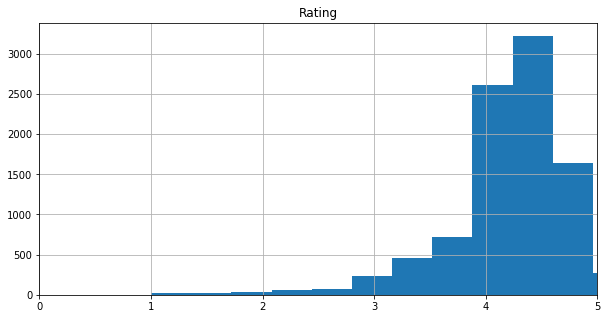

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
gplay.hist(bins=50, figsize=(10,5))
plt.xlim((0,5))
plt.show()